# Can Language Models produce correct structured output?
The goaal of this notebook is to explorer the nature of the mistakes a Language Modell can make when producing structured output like code. The idea is that it is prone to making syntactic errors that could be avoided when scaling up the dataset.

In [1]:
from src.RawDataLoaders import CodeSearchNet_RawDataLoader, CoNaLa_RawDataLoader
from src.models_and_transforms.text_transforms import Numericalise_Transform, Rename_Transform
from src.models_and_transforms.complex_transforms import *
from src.models_and_transforms.BART_models import BART_Simple
from src.Experiments import Sequence_BLEU_Experiment
from src.models_and_transforms.SOTA_transforms import CoNaLa_SOTA_Transform, Django_SOTA_Transform
from src.pipe_datasets import BART_Pipe_Dataset
from src.useful_utils import chunks, download_from_url, Validate_and_Save_Callback

from pytorch_lightning import Trainer, Callback, seed_everything
from pytorch_lightning.callbacks import ModelCheckpoint, LearningRateLogger
from pytorch_lightning.callbacks.base import Callback
from pytorch_lightning.loggers import WandbLogger
from tokenizers import processors, Tokenizer
from transformers import BartConfig
import torch
import ray
# ray.init(ignore_reinit_error=True)
import random
import itertools
import cloudpickle
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import json
from tqdm.auto import tqdm 

%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
code_search_net_RawDataLoader = CodeSearchNet_RawDataLoader("./datasets/code_search_net", language="python", max_chars=600)

In [2]:
conala_RawDataLoader = CoNaLa_RawDataLoader()

## Running SOTA model on CoNaLa and Django

In [17]:
conala_test_samples = conala_RawDataLoader.get_samples('test')
conala_transform = CoNaLa_SOTA_Transform(cuda=False, fields={'input_field':'description', 'output_field':'pred_code'})

load parser from [src/external_repos/external-knowledge-codegen/best_pretrained_models/finetune.mined.retapi.distsmpl.dr0.3.lr0.001.lr_de0.5.lr_da15.beam15.seed0.mined_100000.intent_count100k_topk1_temp5.bin]


loading reranker...


In [10]:
# takes around 5 mins for inference
samples = conala_transform(conala_test_samples[:10])

os.system('str_0')


initializing rerank features for hypotheses...
initializing features...
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.u

print(str_0.decode('str_0', 'ignore'))


initializing rerank features for hypotheses...
initializing features...
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.u

[i for i in var_0 if i == i]


initializing rerank features for hypotheses...
initializing features...
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.u

""" """.join(str(x) for x in str(var_0))


initializing rerank features for hypotheses...
initializing features...
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.u

unicodedata.normalize('NFKD', string).encode('utf8')


initializing rerank features for hypotheses...
initializing features...
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.u

list(var_0.values())


initializing rerank features for hypotheses...
initializing features...
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.u

list(var_0.values())


initializing rerank features for hypotheses...
initializing features...
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.u

subprocess.call('str_0', **subprocess.check_output('str_0'), shell=True)


initializing rerank features for hypotheses...
initializing features...
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.u

"""""".join([str_0])


initializing rerank features for hypotheses...
initializing features...
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.u

pd.concat([var_0] * 5, ignore_index=True)



initializing rerank features for hypotheses...
initializing features...
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.u

In [91]:
test_samples = [{'description':'multiply each element of list `foo` by 2'}]
test_samples = conala_transform(test_samples)
test_samples[0]['pred_code']

var_0 = [(i * j) for i, j in zip(var_0, var_0)]



initializing rerank features for hypotheses...
initializing features...
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.u

'foo = [(x * y) for x in foo]'

In [80]:
simi_expr = Sequence_BLEU_Experiment(fields={'target_seq':'code', 'predicted_seq':'pred_code'})
simi_expr.__transform__(samples)[:2]

[{'description': 'send a signal `signal.SIGUSR1` to the current process',
  'code': 'os.kill(os.getpid(), signal.SIGUSR1)',
  'pred_code': "os.system('<unk> <unk> <unk>')",
  'BLEU': 0.0},
 {'description': "decode a hex string '4a4b4c' to UTF-8.",
  'code': "bytes.fromhex('4a4b4c').decode('utf-8')",
  'pred_code': "print(4a4b4c.decode('4a4b4c'))",
  'BLEU': 0.0},
 {'description': 'check if all elements in list `myList` are identical',
  'code': 'all(x == myList[0] for x in myList)',
  'pred_code': '[i for i in myList if i == 2]',
  'BLEU': 0.0},
 {'description': 'format number of spaces between strings `Python`, `:` and `Very Good` to be `20`',
  'code': "print('%*s : %*s' % (20, 'Python', 20, 'Very Good'))",
  'pred_code': '""" """.join(str(x) for x in str(Python))',
  'BLEU': 0.0},
 {'description': 'How to convert a string from CP-1251 to UTF-8?',
  'code': "d.decode('cp1251').encode('utf8')",
  'pred_code': "unicodedata.normalize('NFKD', string).encode('utf8')",
  'BLEU': 0.27901593

In [93]:
samples = simi_expr(samples)

unsmoothed_official_BLEU: 0.22539098849201342
nltk_BLEU: 0.2529552430370321


In [94]:
json.dump(samples, open("CoNaLa_TranX_predictions.json", 'w'), indent=4)

# Training BART on CoNaLa
### Using the BPE tokens trained from code search net

# Training BART codeBPE

In [2]:
conala_RawDataLoader = CoNaLa_RawDataLoader()
conala_samples = conala_RawDataLoader.get_samples('mined_GPT3', max_char_len=200)[:20000]
print('Dataset size:',len(conala_samples))
conala_samples[31]

Dataset size: 20000


{'description': 'sort a list of lists `the_list` by the second item in each list',
 'code': "sorted(the_list, key=lambda x: int(x.split('_')[1]))"}

Numericaliser. Ex: 'This is a test' -> [0, 3863, 343, 276, 1772, 2]


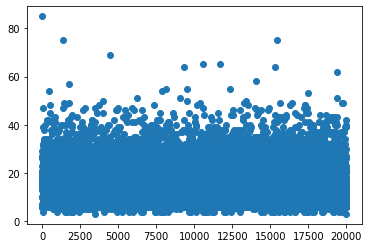

In [3]:
code_numericalise_transform = Numericalise_Transform(numericaliser='Code32k', fields=[('description','input_ids'),('code','target_ids')])

conala_dataset = BART_Pipe_Dataset(conala_samples, 
                                         sort_key_fn=lambda sample_obj: len(sample_obj['target_ids']),
#                                          valid_sample_fn=lambda sample_obj: len(sample_obj['target_ids'])<80 and len(sample_obj['input_ids'])<80,
                                         shuffle=True,
                                         batch_bucket_size=1, 
                                         slow_pipe=[], real_time_pipe=[code_numericalise_transform])
conala_dataloader = conala_dataset.to_dataloader(16)
lengths = [len(s['target_ids']) for s in conala_dataset]
plt.scatter(range(len(lengths)), lengths)

In [4]:
config = BartConfig(vocab_size=32000)
model = BART_Simple(from_pretrained=False, config=config)

In [5]:
from pytorch_lightning import EvalResult
import wandb
def CoNaLa_valid_fn(model):
    conala_RawDataLoader = CoNaLa_RawDataLoader()
    BART_cond_gen_transform = BART_Conditional_Generator_Transform(model, 
                                                                    numericaliser='Code32k', 
                                                                    denumericaliser='Code32k',
                                                                    device='cuda',
                                                                    debug=False,
                                                                    chunk_size=32,
                                                                    max_length=40)
    valid_samples = conala_RawDataLoader.get_samples('valid')
    test_samples = conala_RawDataLoader.get_samples('test')
    train_samples = conala_RawDataLoader.get_samples('train')[:100]
    return_dict = {}
    
    for samples, name in [(valid_samples, 'valid'), (test_samples, 'test'), (train_samples, 'train')]:
        samples = Rename_Transform(fields=[('description', 'input_text')])(samples)
        samples = BART_cond_gen_transform(samples)
        samples = Sequence_BLEU_Experiment(fields = {'predicted_seq':'pred_text', 'target_seq':'code'}, debug=False)(samples)
        
        nltk_BLEU = np.average([s["nltk_BLEU"] for s in samples])
        table = wandb.Table(columns=["Desc", "True", "Pred"])
        for sample_obj in samples:
            table.add_data(sample_obj['input_text'], sample_obj['code'], sample_obj['pred_text'])
        
        return_dict[f'{name}_nltk_BLEU'] = nltk_BLEU
        return_dict[f'{name}_samples'] = samples
    
    return return_dict

In [6]:
model.lr = 0.00001
# model.batch_size = 1
# model.train_dataloader = lambda: conala_dataset.to_dataloader(model.batch_size)

In [ ]:
saving_cb = Validate_and_Save_Callback(filepath='saved_models/BART_CoNaLa/',
                                       prefix='BART_codeBPE_mined20k_step_LR',
                                       validate_fn=CoNaLa_valid_fn,
                                       monitor='valid_nltk_BLEU',
                                       interval=0.3)
wandb_logger = WandbLogger(name='test',project='pytorchlightning')
lr_logger_cb = LearningRateLogger(logging_interval='step')

trainer = Trainer(gpus=[0], gradient_clip_val=0.5, amp_level='O1', max_epochs=200, callbacks=[saving_cb, lr_logger_cb], logger=wandb_logger, 
                  accumulate_grad_batches=1)
trainer.fit(model, conala_dataloader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]
wandb: Currently logged in as: aquaktus (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.5 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade



  | Name | Type                         | Params
------------------------------------------------------
0 | BART | BartForConditionalGeneration | 387 M 
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:37: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


In [70]:
torch.save({'model':model, 'train_dataset':train_dataset}, 'BART_6k_chars.pickle', pickle_module=cloudpickle)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BART_Simple. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BartForConditionalGeneration. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BartModel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Embedding. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "

In [8]:
config = BartConfig(vocab_size=32000)
BART_cond_gen_transform = BART_Conditional_Generator_Transform("saved_models/BART_CoNaLa/BART_codeBPE_mined20k_set_lowLR_{'nltk_BLEU': 0.2149831961314364, 'valid_samples': <wandb.data_types.Table object at 0x7f669336c1d0>}_step_64875.ckpt", 
                                                                numericaliser='Code32k', 
                                                                denumericaliser='Code32k',
                                                                device='cuda',
                                                                from_pretrained=False,
                                                                config=config)

Numericaliser. Ex: 'This is a test' -> [0, 3863, 343, 276, 1772, 2]
Denumericaliser. Ex: [0,1,2,3,4,5,6,7,8,9] -> !"#$%


In [23]:
conala_RawDataLoader = CoNaLa_RawDataLoader()
# test_samples = conala_RawDataLoader.get_samples('train')[:10]
# test_samples = conala_samples[:10]
test_samples = [{'description':'split a string `foo` by comma'}]
test_samples = Rename_Transform(fields=[('description', 'input_text')])(test_samples)

test_samples = BART_cond_gen_transform(test_samples)
test_samples

[{'input_text': 'split a string `foo` by comma',
  'input_ids': [0, 961, 276, 711, 613, 3797, 68, 626, 6155, 2],
  'pred_ids': [0, 3797, 277, 6773, 18, 961, 401, 3797, 4022, 438],
  'pred_text': "foo = foo.split('foo bar')"}]

# Pre-Training BART on Code Search Net

In [6]:
pretrain_samples = code_search_net_RawDataLoader.get_samples("train", fields=['code'])

In [12]:
conala_train_samples = conala_RawDataLoader.get_samples('train')

In [48]:
conala_samples[8]

{'description': 'swap values in a tuple/list inside a list `mylist`',
 'code': 'map(lambda t: (t[1], t[0]), mylist)'}

In [14]:
conala_train_dataset = BART_Pipe_Dataset(conala_train_samples, slow_pipe=[], real_time_pipe=[
    BART_Numericalise_Transform(fields=[('description','input_ids'),('code','target_ids')])
])

In [18]:
conala_train_dataloader = conala_train_dataset.to_dataloader(16)

In [22]:
model = BART_Simple()

In [23]:
trainer = Trainer(gpus=[1], gradient_clip_val=0.5, amp_level='O1', max_epochs=100, 
                  callbacks=[saving_cb])
trainer.fit(model, conala_train_dataloader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]

  | Name | Type                         | Params
------------------------------------------------------
0 | BART | BartForConditionalGeneration | 406 M 


Saving latest checkpoint..


1

In [16]:
trainer.save_checkpoint('saved_models/BART_CoNaLa/BART_CodeBPE_CoNaLa_100_epochs')

In [25]:
BART_cond_gen_transform = BART_Conditional_Generator_Transform("saved_models/BART_CoNaLa/BART_CoNaLa_100_epochs")

Running model on cuda


In [99]:
test_samples = [{'input_text':"l is an empty list"}]
BART_cond_gen_transform(test_samples)[0]['pred_text']

'l = list(itertools.chain.from_iterable(iterable([0, 1], repeat=False]))([0] for i in range(0, len(l)) for a item in l])\nelse:\n    l   pass'

In [68]:
train_dataset = BART_Span_Prediction_dataset(samples)

In [11]:
train_dataloader = train_dataset.to_dataloader(2)

In [52]:
for batch in train_dataloader:
    print(batch['decoder_input_ids'])
    print(batch['decoder_target_ids'])
    print(batch['target_attention_mask'])
    print(torch.masked_select(batch['decoder_target_ids'], batch['target_attention_mask'].type(torch.bool)))
    break

tensor([[    0,  9232, 18134, 41087,  1215,   560,  1215, 48408,  1640, 41087,
          3256, 50118,  1437,  1437,  1437, 49434, 50118,  1437,  1437,  1437,
         32988,    10,   385, 34748,   128, 41087,   108,  7626,     7,    10,
         10798, 49683,    11,    36,  8766,     6,   235,     6,  2576,     6,
           314,    43,   645, 50140,  1437,  1437,  1437,  4832, 46669, 20705,
            35,    10,   385, 34748,   128, 41087,   108,  7626, 50118,  1437,
          1437,  1437,  4832, 30921,    35,    10, 10798, 49683,  8985,     9,
             5, 20705,    11,    36,  8766,     6,   235,     6,  2576,     6,
           314,    43,   645, 50118,  1437,  1437,  1437, 49434, 50118,  1437,
          1437,  1437,   671, 20705,     4,  8766, 49196, 20705,     4,  4070,
         49196, 20705,     4, 23724, 49196, 20705,     4,  6960, 43048,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,  

In [19]:
lengths = [len(train_dataset[i]['input_ids']) for i in tqdm(range(10000))]

In [51]:
trainer = Trainer(gpus=[1], gradient_clip_val=0.5, amp_level='O1', limit_train_batches=0.001, max_epochs=1, checkpoint_callback=checkpoint_callback, 
                  callbacks=[saving_cb])
trainer.fit(model, train_dataloader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]

  | Name | Type                         | Params
------------------------------------------------------
0 | BART | BartForConditionalGeneration | 406 M 


1

In [61]:
BART_cond_gen_transform = BART_Conditional_Generator_Transform("./saved_models/BART_CodeSearchNet/BART_600_step_21960.ckpt")

Running model on cuda
Numericaliser. Ex: 'This is a test' -> [0, 713, 16, 10, 1296, 2]
Denumericaliser. Ex: [0,1,2,3,4,5,6,7,8,9] -> <s><pad></s><unk>. the, to and of


In [63]:
# Complete the string bellow
test_samples = [{'input_text':
                 '''def contains_number(x):
    """A function to check if x is an integer"""
'''}]
returned_samples = BART_cond_gen_transform(test_samples)
print(returned_samples[0]['pred_text'])


</s><s>def contains_number(x):
    """A function to check if x is an integer"""
  # # #  #   return x
  %   >>> x.is_int(x)

  # return x.size()


# Data Augmentation

In [77]:
numer_samples = BART_Numericalise_Transform(fields=[('code', 'input_ids')], use_ray=False)(samples[:10000])

In [78]:
max([len(s['input_ids']) for s in numer_samples])

473

In [59]:
a = lambda x: x

In [60]:
a('foo')

'foo'

In [298]:
augmented_samples = Code_Sample_Augmentation_Transform()(samples)

2020-09-08 15:44:44,635	ERROR worker.py:666 -- Calling ray.init() again after it has already been called.


In [300]:
sample_lengths = [len(sample['code']) for sample in augmented_samples]

In [5]:
large_samples = list([{'code':'foo '*40}]*4000)
large_samples += list([{'code':'foo '*40}]*20)
dataset = BART_Span_Prediction_dataset(large_samples)
max_batch_dataloader = dataset.to_dataloader(16)

In [17]:
max(len(s['input_ids']) for s in dataset)

137

In [18]:
model.batch_size = 1
model.train_dataloader = lambda: dataset.to_dataloader(model.batch_size)

In [7]:
trainer = Trainer(gpus=1, gradient_clip_val=0.5, amp_level='O1', max_epochs=100)# , auto_scale_batch_size='binsearch')
trainer.fit(model, max_batch_dataloader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]

  | Name | Type                         | Params
------------------------------------------------------
0 | BART | BartForConditionalGeneration | 406 M 


Saving latest checkpoint..


1